In [1]:
import chess
import chess.pgn
import chess.svg

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import numpy as np

In [2]:
def heatmap_from_board(board):
    control_map = [0 for _ in range(64)]

    for sq in range(63):
        white_attacks = len(list(board.attackers(True, sq)))
        black_attacks = len(list(board.attackers(False, sq)))
        control_map[sq] = white_attacks - black_attacks
        
    heatmap = np.flip(np.array(control_map).reshape((8,8)), axis=0)
    return heatmap

In [3]:
def heatmap_from_game(pgn_filepath):
    game_heatmap = []
    board_history = []

    with open(pgn_filepath) as pgn:
        game = chess.pgn.read_game(pgn)

        b = game.board()
        h = heatmap_from_board(b)
        
        game_heatmap.append(h)
        board_history.append(b.copy())

        for move in game.mainline_moves():
            b.push(move)
            h = heatmap_from_board(b)
            
            game_heatmap.append(h)
            board_history.append(b.copy())
            
    return game_heatmap, board_history

In [4]:
cmap = sns.diverging_palette(160, 300, as_cmap=True)

In [5]:
heatmaps, boards = heatmap_from_game("Morphy_vs_Domingues_1864.pgn")

In [9]:
def animate_frame(_min, _max, game_history):
    def func(i):
        frame = plt.imshow(
            game_history[i], cmap=cmap, vmin=_min, vmax=_max)
        return frame
    return func
        
def animate_history(heatmaps, path, title=""):
    _max = np.max(heatmaps)
    _min = np.min(heatmaps)
        
    Writer = animation.writers["ffmpeg"]
    writer = Writer(fps=1.67, bitrate=1200)
        
    fig = plt.figure(figsize=(6,6))
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
        
    ani = animation.FuncAnimation(fig, animate_frame(_min, _max, heatmaps), frames=len(heatmaps))
    ani.save(path, writer=writer)

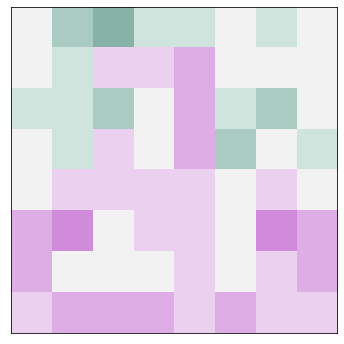

In [10]:
animate_history(heatmaps, "Morphy_vs_Domingues_1864.mp4")

In [40]:
# ===== OPENINGS =====

files = ["a", "b", "c", "d", "e", "f", "g", "h"]

ruy_lopez = ["e4", "e5", "Nf3", "Nc6", "Bb5"]
scotch = ["e4", "e5", "Nf3", "Nc6", "d4"]
closed_sicilian = ["e4", "c5", "Nc3", "Nc6"]
nimzo_indian = ["d4", "Nf6", "c4", "e6", "Nc3", "Bb4"]
london = ["d4", "d5", "Nf3", "Nf6", "Bf4"]
four_knights = ["e4", "e5", "Nf3", "Nc6", "Nc3", "Nf6"]
italian = ["e4", "e5", "Nf3", "Nc6", "Bc4"]
english_open = ["c4", "c5"]

In [8]:
def load_opening(opening):
    b = chess.Board()
    
    for move in opening:
        b.push_san(move)
        
    return b

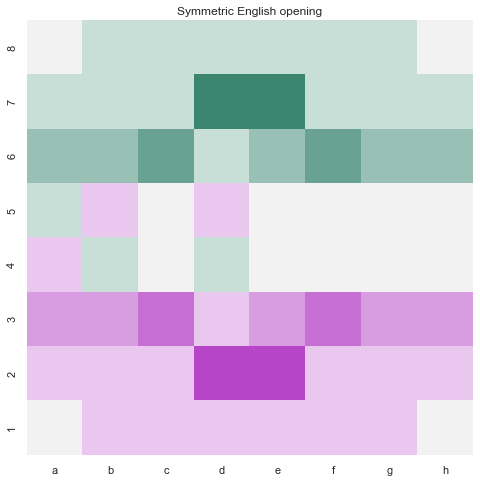

In [42]:
hm = heatmap_from_board(load_opening(english_open))

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_title("Symmetric English opening")
sns.heatmap(hm, cmap=cmap, center=0, xticklabels=files, yticklabels=(range(8,0,-1)), cbar=False, ax=ax)

plt.savefig("Symmetric English opening.png")